In [4]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import bs4 
import re
import seaborn as sns
%matplotlib inline


In [5]:
year_range = range(2006, 2018)

In [102]:
def get_draft_html(year):
    site = 'http://games.espn.com/ffl/tools/draftrecap?leagueId=40294&seasonId=' + str(year)
    page = urlopen(site)
    soup = bs4.BeautifulSoup(page, 'html.parser')
    return soup.find_all('tr')[2:]
    
# def scrape_data(ul_list, year):
#     pick_ = 1
#     round_list = []
#     pick_list = []
#     player_list = []
#     team_list = []
#     keeper_list = []
# #     nfl_team_list = []
# #     position_list = []


#     for i in range(len(ul_list) - 1):
#         try:
#             player_list.append(ul_list[i].find_all('a')[0].text.lower())
# #             nfl_team_list.append(ul_list[i].find_all('td')[1].text.split(',')[1].split()[0])
# #             position_list.append(ul_list[i].find_all('td')[1].text.split(',')[1].split()[1])
#             team_list.append(ul_list[i].find_all('a')[1].text)
#             pick_list.append(pick_)
#             pick_ = pick_ + 1
#             round_list.append(round_)
#             if len(ul_list[i].find_all('span')) == 0:
#                 keeper_list.append(0)
#             elif ul_list[i].find_all('span')[0].text == 'K':
#                 keeper_list.append(1)
#         except:
#             round_ = int(ul_list[i].text[9:])
            


#     return pd.DataFrame({'year': year
#                          , 'round':round_list 
#                          , 'pick': pick_list
#                          , 'player': player_list
#                          , 'team': team_list
#                          , 'keeper': keeper_list
# #                          , 'position': position_list
# #                          , 'nfl_team': nfl_team_list                        
#                         })


# def scrape_data_old(ul_list, year):
#     pick_ = 1
#     round_list = []
#     pick_list = []
#     player_list = []
#     team_list = []
#     keeper_list = []
#     nfl_team_list = []
#     position_list = []
#     for i in range(len(ul_list) - 1):
#         try:
#             print(year)
#             player_list.append(ul_list[i].find_all('td')[1].text.split(',')[0].lower())
#             nfl_team_list.append(ul_list[i].find_all('td')[1].text.split(',')[1].split()[0])
#             position_list.append(ul_list[i].find_all('td')[1].text.split(',')[1].split()[1])
#             team_list.append(ul_list[i].find_all('a')[0].text)
#             pick_list.append(ul_list[i].find_all('td')[0].text.split(',')[0].lower())
#             pick_ = pick_ + 1
#             round_list.append(round_)
#             if len(ul_list[i].find_all('span')) == 0:
#                 keeper_list.append(0)
#             elif ul_list[i].find_all('span')[0].text == 'K':
#                 keeper_list.append(1)
#         except:
#             round_ = int(ul_list[i].text[9:])
            


#     return pd.DataFrame({'year': year
#                          , 'round':round_list 
#                          , 'pick': pick_list
#                          , 'player': player_list
#                          , 'team': team_list
#                          , 'keeper': keeper_list
#                          , 'position': position_list
#                          , 'nfl_team': nfl_team_list
                        
#                         })

def scrape_data(ul_list, year):
    pick_ = 1
    round_list = []
    pick_list = []
    player_list = []
    team_list = []
    keeper_list = []
    nfl_team_list = []
    position_list = []


    for i in range(len(ul_list) - 1):
        if len(ul_list[i].find_all('td')) == 3:
            player_list.append(ul_list[i].find_all('a')[0].text.lower())
            try:
                nfl_team_list.append(ul_list[i].find_all('td')[1].text.split(',')[1].split()[0])
            except:
                nfl_team_list.append(None)
            try:
                position_list.append(ul_list[i].find_all('td')[1].text.split(',')[1].split()[1])
            except:
                position_list.append(None)
            team_list.append(ul_list[i].find_all('a')[1].text)
            pick_list.append(pick_)
            pick_ = pick_ + 1
            round_list.append(round_)
            if len(ul_list[i].find_all('span')) == 0:
                keeper_list.append(0)
            elif ul_list[i].find_all('span')[0].text == 'K':
                keeper_list.append(1)
        elif len(ul_list[i].find_all('td')) == 1:
            round_ = int(ul_list[i].text[9:])
            


    return pd.DataFrame({'year': year
                         , 'round':round_list 
                         , 'pick': pick_list
                         , 'player': player_list
                         , 'team': team_list
                         , 'keeper': keeper_list
                         , 'position': position_list
                         , 'nfl_team': nfl_team_list                        
                        })


def scrape_data_old(ul_list, year):
    pick_ = 1
    round_list = []
    pick_list = []
    player_list = []
    team_list = []
    keeper_list = []
    nfl_team_list = []
    position_list = []
    for i in range(len(ul_list) - 1):
        if len(ul_list[i].find_all('td')) == 3:
            player_list.append(ul_list[i].find_all('td')[1].text.split(',')[0].lower())
            try:
                nfl_team_list.append(ul_list[i].find_all('td')[1].text.split(',')[1].split()[0])
            except:
                nfl_team_list.append(None)
            try:
                position_list.append(ul_list[i].find_all('td')[1].text.split(',')[1].split()[1])
            except:
                position_list.append(None)
            team_list.append(ul_list[i].find_all('a')[0].text)
            pick_list.append(ul_list[i].find_all('td')[0].text.split(',')[0].lower())
            pick_ = pick_ + 1
            round_list.append(round_)
            if len(ul_list[i].find_all('span')) == 0:
                keeper_list.append(0)
            elif ul_list[i].find_all('span')[0].text == 'K':
                keeper_list.append(1)
        elif len(ul_list[i].find_all('td')) == 1:
            round_ = int(ul_list[i].text[9:])
            


    return pd.DataFrame({'year': year
                         , 'round':round_list 
                         , 'pick': pick_list
                         , 'player': player_list
                         , 'team': team_list
                         , 'keeper': keeper_list
                         , 'position': position_list
                         , 'nfl_team': nfl_team_list
                        
                        })



In [133]:
# year = 2006
year_range = range(2006, 2018)
df_total = pd.DataFrame({'year': [], 'round':[] , 'pick': [], 'player': [], 'team': [], 'keeper': [], 'position': [], 'nfl_team': []})

for year in year_range:
    if year == 2017:
        df = scrape_data(get_draft_html(year), year)
        df_total = pd.concat([df_total, df], sort=True)
    else:
        df = scrape_data_old(get_draft_html(year), year)
        df_total = pd.concat([df_total, df], sort=True)
df_total = df_total.reset_index(drop=True)
df_total['drop_bad_rows'] = df_total['player'].apply(lambda x: 1 if 'round' in x else 0)
df_total = df_total[df_total['drop_bad_rows'] == 0].drop('drop_bad_rows', axis=1)


In [134]:
df_total['pick'] = df_total['pick'].astype('int')

In [135]:
last_keeper_round = df_total[df_total['keeper'] == 1].groupby(['year'])['round'].max().to_frame('last_keeper_round')
last_keeper_pick = df_total[df_total['keeper'] == 1].groupby(['year'])['pick'].max().to_frame('last_keeper_pick')

In [136]:
df_total = df_total.merge(last_keeper_round, left_on='year', right_index=True)
df_total = df_total.merge(last_keeper_pick, left_on='year', right_index=True)

In [137]:
df_total['non_keeper_round'] = df_total['round'] - df_total['last_keeper_round']
df_total['non_keeper_pick'] = df_total['pick'].astype('int') - df_total['last_keeper_pick'].astype('int')

In [138]:
df_total[df_total['non_keeper_round'] == 2].sort_values(['non_keeper_pick', 'year'])

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick
311,0.0,Den,133,selvin young,RB,12.0,Team Allen,2007.0,10.0,120,2.0,13
502,0.0,Phi,133,reggie brown,WR,12.0,Dirty Sanchez,2008.0,10.0,120,2.0,13
693,0.0,Det,133,matthew stafford,QB,12.0,motorboatin sbs,2009.0,10.0,120,2.0,13
884,0.0,Car,133,jimmy clausen,QB,12.0,Flying Kamakazes,2010.0,10.0,120,2.0,13
1075,0.0,Oak,133,michael bush,RB,12.0,All Day,2011.0,10.0,120,2.0,13
1278,0.0,StL,145,brian quick,WR,13.0,The Plague,2012.0,11.0,132,2.0,13
1493,0.0,GB,157,johnathan franklin,RB,14.0,Miami Sharks,2013.0,12.0,144,2.0,13
1708,0.0,StL,157,tre mason,RB,14.0,Uncle Julio's Pot Luck,2014.0,12.0,144,2.0,13
1923,0.0,Ten,157,david cobb,RB,14.0,Uncle Julio's Gurley Pot Luck,2015.0,12.0,144,2.0,13
2136,0.0,Bal,157,kenneth dixon,RB,14.0,The Plague,2016.0,12.0,144,2.0,13


In [139]:
df_total[(df_total['year'] != 2006) & (df_total['keeper'] == 0) & (df_total['position'] == 'K')].sort_values('non_keeper_pick')

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick
2147,0.0,Bal,168,justin tucker,K,14.0,Faith + 1,2016.0,12.0,144,2.0,24
329,0.0,Cin,151,shayne graham,K,13.0,Team Retro,2007.0,10.0,120,3.0,31
1513,0.0,NE,177,stephen gostkowski,K,15.0,Flying Kamakazes,2013.0,12.0,144,3.0,33
2371,0.0,Bal,177,justin tucker,K,15.0,Faith + 1,2017.0,12.0,144,3.0,33
1944,0.0,NE,178,stephen gostkowski,K,15.0,Flying Kamakazes,2015.0,12.0,144,3.0,34
1945,0.0,Ind,179,adam vinatieri,K,15.0,Faith + 1,2015.0,12.0,144,3.0,35
1732,0.0,NE,181,stephen gostkowski,K,16.0,Uncle Julio's Pot Luck,2014.0,12.0,144,4.0,37
909,0.0,SD,158,nate kaeding,K,14.0,All Day,2010.0,10.0,120,4.0,38
1518,0.0,Hou,182,randy bullock,K,16.0,All Day,2013.0,12.0,144,4.0,38
1519,0.0,Atl,183,matt bryant,K,16.0,Faith + 1,2013.0,12.0,144,4.0,39


/Users/wcasey/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


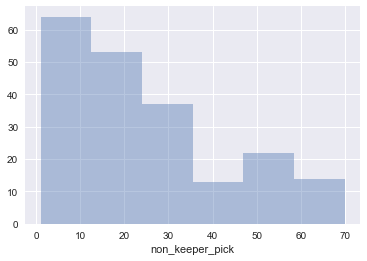

In [254]:
sns.distplot(df_total[(df_total['year'] != 2006) & (df_total['keeper'] == 0) & (df_total['position'] == 'RB')]['non_keeper_pick'], bins=6, kde=False)

/Users/wcasey/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


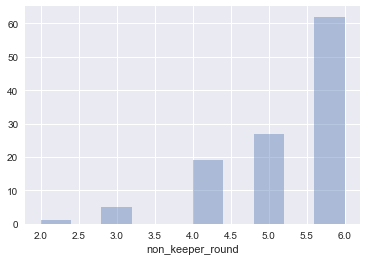

In [255]:
sns.distplot(df_total[(df_total['year'] != 2006) & (df_total['keeper'] == 0) & (df_total['position'] == 'K')]['non_keeper_round'], kde=False)

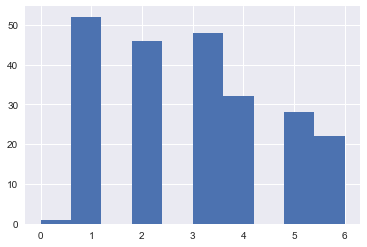

In [356]:
df_total[(df_total['year'] != 2006) & (df_total['keeper'] == 0) & (df_total['position'] == 'WR')]['non_keeper_round'].hist()

In [143]:
df_total[(df_total['year'] == 2016) & (df_total['team'] == 'Faith + 1') & (df_total['keeper'] == 0)]

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick
2112,0.0,Dal,133,terrance williams,WR,12.0,Faith + 1,2016.0,12.0,144,0.0,-11
2124,0.0,Dal,145,ezekiel elliott,RB,13.0,Faith + 1,2016.0,12.0,144,1.0,1
2147,0.0,Bal,168,justin tucker,K,14.0,Faith + 1,2016.0,12.0,144,2.0,24
2148,0.0,Cin,169,andy dalton,QB,15.0,Faith + 1,2016.0,12.0,144,3.0,25
2171,0.0,Hou,192,braxton miller,WR,16.0,Faith + 1,2016.0,12.0,144,4.0,48
2172,0.0,NYJ,193,jets d/st,D/ST,17.0,Faith + 1,2016.0,12.0,144,5.0,49


In [144]:
df_total[(df_total['team'].isin(['Donkey Punch'])) & (df_total['keeper'] == 0) & (df_total['non_keeper_round'] == 1)]

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick
299,0.0,Det,121,calvin johnson,WR,11.0,Donkey Punch,2007.0,10.0,120,1.0,1
498,0.0,Cle,129,donte stallworth,WR,11.0,Donkey Punch,2008.0,10.0,120,1.0,9
689,0.0,Min,129,percy harvin,WR,11.0,Donkey Punch,2009.0,10.0,120,1.0,9
875,0.0,Dal,124,dez bryant,WR,11.0,Donkey Punch,2010.0,10.0,120,1.0,4
1069,0.0,SF,127,braylon edwards,WR,11.0,Donkey Punch,2011.0,10.0,120,1.0,7
1488,0.0,NE,152,kenbrell thompkins,WR,13.0,Donkey Punch,2013.0,12.0,144,1.0,8
1704,0.0,Cin,153,jeremy hill,RB,13.0,Donkey Punch,2014.0,12.0,144,1.0,9
1917,0.0,Chi,151,kevin white,WR,13.0,Donkey Punch,2015.0,12.0,144,1.0,7
2127,0.0,Cle,148,corey coleman,WR,13.0,Donkey Punch,2016.0,12.0,144,1.0,4
2341,0.0,Min,147,dalvin cook,RB,13.0,Donkey Punch,2017.0,12.0,144,1.0,3


In [145]:
owner_list = pd.read_csv('/Users/wcasey/Desktop/ff_owners2.csv')

In [179]:
latest_owner_list = owner_list[owner_list['year'] == 2018][['team_id', 'team_name', 'owner']]

In [147]:
distinct_owner_list = owner_list[['team_id', 'team_name']].drop_duplicates()

In [150]:
df_total_copy = df_total

In [151]:
df_total_copy

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick
179,1.0,Sea,1,matt hasselbeck,QB,1.0,Donkey Punch,2007.0,10.0,120,-9.0,-119
180,1.0,TB,2,carnell williams,RB,1.0,Cherry Poppins,2007.0,10.0,120,-9.0,-118
181,1.0,Ari,3,edgerrin james,RB,1.0,Dirty Sanchez,2007.0,10.0,120,-9.0,-117
182,1.0,Car,4,jake delhomme,QB,1.0,Team Putnam,2007.0,10.0,120,-9.0,-116
183,1.0,Chi,5,muhsin muhammad,WR,1.0,Flyin' Purple People Eaters,2007.0,10.0,120,-9.0,-115
184,1.0,Cle,6,jamal lewis,RB,1.0,Thor's Hammers,2007.0,10.0,120,-9.0,-114
185,1.0,NO,7,reggie bush,RB,1.0,Team Retro,2007.0,10.0,120,-9.0,-113
186,1.0,KC,8,larry johnson,RB,1.0,motorboatin sbs,2007.0,10.0,120,-9.0,-112
187,1.0,StL,9,steven jackson,RB,1.0,frontpage news,2007.0,10.0,120,-9.0,-111
188,1.0,Mia,10,ronnie brown,RB,1.0,Lenetown Ligers,2007.0,10.0,120,-9.0,-110


In [152]:
bad_data = {'Team  Scoregasm': 'Team Scoregasm'
            ,'Half Pint  Hooligans': 'Half Pint Hooligans'
            ,'Haben Schadenfreude ': 'Haben Schadenfreude'
            ,'Texas Two  Step': 'Texas Two Step'
           
           }

def fix_bad_data(name):
    try:
        return bad_data[name]
    except:
        return name
df_total_copy['team'] = df_total_copy['team'].apply(fix_bad_data)

In [153]:
df_total_copy

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick
179,1.0,Sea,1,matt hasselbeck,QB,1.0,Donkey Punch,2007.0,10.0,120,-9.0,-119
180,1.0,TB,2,carnell williams,RB,1.0,Cherry Poppins,2007.0,10.0,120,-9.0,-118
181,1.0,Ari,3,edgerrin james,RB,1.0,Dirty Sanchez,2007.0,10.0,120,-9.0,-117
182,1.0,Car,4,jake delhomme,QB,1.0,Team Putnam,2007.0,10.0,120,-9.0,-116
183,1.0,Chi,5,muhsin muhammad,WR,1.0,Flyin' Purple People Eaters,2007.0,10.0,120,-9.0,-115
184,1.0,Cle,6,jamal lewis,RB,1.0,Thor's Hammers,2007.0,10.0,120,-9.0,-114
185,1.0,NO,7,reggie bush,RB,1.0,Team Retro,2007.0,10.0,120,-9.0,-113
186,1.0,KC,8,larry johnson,RB,1.0,motorboatin sbs,2007.0,10.0,120,-9.0,-112
187,1.0,StL,9,steven jackson,RB,1.0,frontpage news,2007.0,10.0,120,-9.0,-111
188,1.0,Mia,10,ronnie brown,RB,1.0,Lenetown Ligers,2007.0,10.0,120,-9.0,-110


In [154]:
df_total_1 = df_total_copy.merge(distinct_owner_list, left_on='team', right_on='team_name', how='inner').drop('team_name', axis=1)

In [ ]:
df_total_1.loc[1435, 'keeper'] = 1 ## terrence williams not marked as keeper when he should have been

In [155]:
df_total_1['team_id'].value_counts()

9     187
3     187
2     187
11    186
7     186
5     186
12    186
6     186
4     186
1     185
10    185
8     184
Name: team_id, dtype: int64

In [309]:
df_total_1.to_csv('draft_data_csv.csv')

In [302]:
df_total_1[(df_total_1['keeper'] == 0) & (df_total_1['team_id'] == 9)].sort_values('non_keeper_pick')

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick,team_id
1301,0,SD,121,ryan mathews,RB,11,Guinea Pirates,2010,10,120,1,1,9
2011,0,Jax,145,leonard fournette,RB,13,Miami Sharks,2017,12,144,1,1,9
1957,0,Cle,148,johnny manziel,QB,13,Miami Sharks,2014,12,144,1,4,9
1975,0,Bal,149,breshad perriman,WR,13,Miami Sharks,2015,12,144,1,5,9
1921,0,Ari,137,michael floyd,WR,12,Miami Sharks,2012,11,132,1,5,9
1976,0,Jax,150,t.j. yeldon,RB,13,Miami Sharks,2015,12,144,1,6,9
1317,0,NE,126,benjarvus green-ellis,RB,11,Guinea Pirates,2011,10,120,1,6,9
2012,0,Cin,152,john ross,WR,13,Miami Sharks,2017,12,144,1,8,9
1993,0,Cin,153,tyler boyd,WR,13,Miami Sharks,2016,12,144,1,9,9
2013,0,NO,153,alvin kamara,RB,13,Miami Sharks,2017,12,144,1,9,9


In [421]:
df_total_1[(df_total_1['position'] == 'D/ST') & (df_total_1['non_keeper_round'] == 1)]

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick,team_id
418,0,SD,127,chargers d/st,D/ST,11,Team Retro,2007,10,120,1,7,8


In [200]:
df_total_1[['year', 'keeper', 'pick', 'round', 'last_keeper_pick', 'last_keeper_round', 'non_keeper_round']] = df_total_1[['year', 'keeper', 'pick', 'round', 'last_keeper_pick', 'last_keeper_round', 'non_keeper_round']].astype('int')

In [437]:
df_total_1[(df_total_1['team_id'].isin([12])) & (df_total_1['keeper'] == 0) & (df_total_1['non_keeper_round'] == 1)][['team_id', 'year', 'team', 'non_keeper_pick', 'player', 'position' ,'nfl_team']].sort_values(['team_id', 'year'])

,team_id,year,team,non_keeper_pick,player,position,nfl_team
212,12,2007,Dirty Sanchez,3,marshawn lynch,RB,Buf
228,12,2008,Dirty Sanchez,12,deuce mcallister,RB,NO
244,12,2009,Dirty Sanchez,6,ahmad bradshaw,RB,NYG
260,12,2010,Dirty Sanchez,10,ben roethlisberger,QB,Pit
1729,12,2011,Meat 'n' Greet,9,steve smith,WR,Car
2028,12,2012,The Stud Bus,7,robert griffin iii,QB,Wsh
2046,12,2013,Haben Schadenfreude,1,giovani bernard,RB,Cin
2063,12,2014,Haben Schadenfreude,11,cody latimer,WR,Den
2081,12,2015,Haben Schadenfreude,9,devante parker,WR,Mia
2207,12,2016,Dak Dynasty,8,devontae booker,RB,Den


In [341]:
df_total_1[(df_total_1['year'] == 2017) & (df_total_1['non_keeper_round'] == 6)].sort_values('non_keeper_pick')

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick,team_id
2194,0,LAR,205,tavon austin,WR,18,Cuz thats my DJ,2017,12,144,6,61,2
2158,0,Ind,206,adam vinatieri,K,18,Uncle Julio's Gurley Pot Luck,2017,12,144,6,62,6
1856,0,Det,207,theo riddick,RB,18,Half Pint Hooligans,2017,12,144,6,63,11
1458,0,Ari,208,j.j. nelson,WR,18,Faith + 1,2017,12,144,6,64,8
1092,0,Wsh,209,dustin hopkins,K,18,Flying Kamakazes,2017,12,144,6,65,3
1597,0,GB,210,mason crosby,K,18,The Plague,2017,12,144,6,66,10
1093,0,None,211,rams d/st,None,18,Flying Kamakazes,2017,12,144,6,67,3
1718,0,Pit,212,juju smith-schuster,WR,18,Team Scoregasm,2017,12,144,6,68,1
609,0,None,213,eagles d/st,None,18,motorboatin sbs,2017,12,144,6,69,7
185,0,Oak,214,sebastian janikowski,K,18,Donkey Punch,2017,12,144,6,70,5


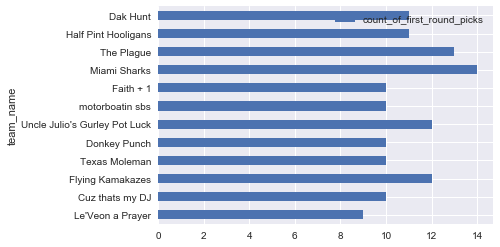

In [187]:
df_total_1[(df_total_1['keeper'] == 0) & (df_total_1['non_keeper_round'] == 1)].groupby('team_id').size().to_frame('count_of_first_round_picks').merge(latest_owner_list, left_index=True, right_on='team_id')[['team_name', 'count_of_first_round_picks']].plot(kind='barh', x='team_name')

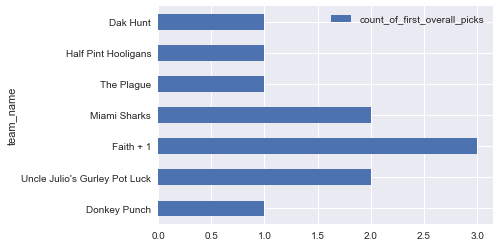

In [195]:
df_total_1[(df_total_1['keeper'] == 0) & (df_total_1['non_keeper_round'] == 1) & (df_total_1['non_keeper_pick'] == 1)].groupby('team_id').size().to_frame('count_of_first_overall_picks').merge(latest_owner_list, left_index=True, right_on='team_id')[['team_name', 'count_of_first_overall_picks']].plot(kind='barh', x='team_name')

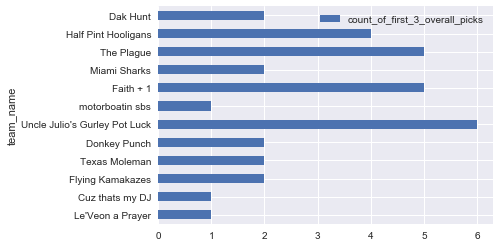

In [193]:
df_total_1[(df_total_1['keeper'] == 0) & (df_total_1['non_keeper_round'] == 1) & (df_total_1['non_keeper_pick'].isin([1, 2, 3]))].groupby('team_id').size().to_frame('count_of_first_3_overall_picks').merge(latest_owner_list, left_index=True, right_on='team_id')[['team_name', 'count_of_first_3_overall_picks']].plot(kind='barh', x='team_name')

In [241]:
df_total_1.groupby('player')['team_id'].nunique().sort_values(ascending=False)


player
texans d/st           6
stephen gostkowski    6
panthers d/st         6
ravens d/st           6
patriots d/st         6
cardinals d/st        5
rams d/st             5
dan bailey            5
adam vinatieri        5
robbie gould          5
cowboys d/st          5
eagles d/st           5
jets d/st             5
pierre garcon         4
49ers d/st            4
darren sproles        4
brandon lafell        4
packers d/st          4
neil rackers          4
patrick crayton       4
robert meachem        4
rob bironas           4
giants d/st           4
chester taylor        4
chiefs d/st           4
dolphins d/st         4
clinton portis        4
steve smith           4
seahawks d/st         4
shayne graham         4
                     ..
jacquizz rodgers      1
keyarris garrett      1
kevin walter          1
randy mcmichael       1
jake locker           1
hakeem nicks          1
kirk cousins          1
eli manning           1
robert woods          1
roy e. williams       1
ronnie hi

In [374]:
df_total_1[df_total_1['player'] == 'chester taylor'].sort_values('year')

,keeper,nfl_team,pick,player,position,round,team,year,last_keeper_round,last_keeper_pick,non_keeper_round,non_keeper_pick,team_id
274,1,Min,100,chester taylor,RB,9,Team Putnam,2007,10,120,-1,-20,3
448,1,Min,101,chester taylor,RB,9,motorboatin sbs,2008,10,120,-1,-19,7
325,0,Min,135,chester taylor,RB,12,Flyin' Purple People Eaters,2009,10,120,2,15,11
1331,1,Chi,104,chester taylor,RB,9,Faith + 1,2010,10,120,-1,-16,8


In [372]:
# sns.barplot(
# data=(df_total_1[(df_total_1['year'] != 2006) & (df_total_1['keeper'] == 0)][['non_keeper_round', 'position']]
#     .groupby(['position', 'non_keeper_round'])['non_keeper_round']
#      .sum()
#      .to_frame('count_per_round')
#      .reset_index()
#     .rename(columns={'non_keeper_round': 'round'})
#     .sort_values('round')

# ), x = 'round', y='count_per_round', hue='position')

In [393]:
postion_per_round = df_total_1[(df_total_1['year'] != 2006) & (df_total_1['keeper'] == 0) & (df_total_1['position'] == 'D/ST')]['non_keeper_round'].value_counts().reset_index().rename(columns={'index':'round', 'non_keeper_round': 'count_per_round'}).sort_values('round')
postion_per_round['percent'] = postion_per_round['count_per_round']/sum(postion_per_round['count_per_round'])

In [394]:
postion_per_round

,round,count_per_round,percent
5,1,1,0.010526
4,2,6,0.063158
3,3,10,0.105263
1,4,27,0.284211
0,5,37,0.389474
2,6,14,0.147368


In [404]:
position_per_round = df_total_1[df_total_1['keeper'] == 0][['non_keeper_round', 'position']].groupby(['non_keeper_round', 'position'])['position'].size().to_frame('count').reset_index()

In [411]:
position_per_round['total'] = position_per_round.groupby('non_keeper_round')['count'].transform('sum')

In [412]:
position_per_round['percent'] = position_per_round['count']/position_per_round['total']


In [415]:
position_per_round[['non_keeper_round', 'position', 'count', 'percent']]

,non_keeper_round,position,count,percent
0,1,D/ST,1,0.007576
1,1,QB,11,0.083333
2,1,RB,64,0.484848
3,1,TE,4,0.030303
4,1,WR,52,0.393939
5,2,D/ST,6,0.045455
6,2,K,1,0.007576
7,2,QB,14,0.106061
8,2,RB,56,0.424242
9,2,TE,9,0.068182


In [409]:
sum([27
,19
,10
,17
,21
,32]
   )

126